# ROC curves and fitting suitable k-nn and decision tree models to the Weekly dataset

In [20]:
import numpy as np
import random
import pylab
import pandas as pd
from scipy import stats
from sklearn.datasets import make_regression
from matplotlib import pyplot as plt

In [70]:
df = pd.read_csv("Weekly.csv")
df.head()

df1 = df.drop(['Today'], axis=1)
df1.replace({'Up':1, 'Down':0}, inplace=True)
df1.head()
df1.describe()

,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Direction
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,545.000000,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.555556
std,314.511526,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,0.497132
min,1.000000,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,0.000000
25%,273.000000,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,0.000000
50%,545.000000,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,1.000000
75%,817.000000,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.000000
max,1089.000000,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,1.000000


### ROC Curves

#### 1. Write a python function that takes the predicted labels and the true label arrays, and computes the ROC curve as well as the area under the ROC curve/Area Under Curve(AUC).

In [71]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=1000, n_informative=10, n_features=20, flip_y=0.2)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

model = RandomForestClassifier()
model.fit(X_train, y_train)

prob_vector = model.predict_proba(X_test)[:, 1]

In [72]:
def true_false_positive(threshold_vector, y_test):
    true_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 1)
    true_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 0)
    false_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 0)
    false_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 1)

    tpr = true_positive.sum() / (true_positive.sum() + false_negative.sum())
    fpr = false_positive.sum() / (false_positive.sum() + true_negative.sum())

    return tpr, fpr

In [25]:
def roc_from_scratch(probabilities, y_test, partitions=100):
    roc = np.array([])
    for i in range(partitions + 1):
        
        threshold_vector = np.greater_equal(probabilities, i / partitions).astype(int)
        tpr, fpr = true_false_positive(threshold_vector, y_test)
        roc = np.append(roc, [fpr, tpr])
        
    return roc.reshape(-1, 2)

Text(0, 0.5, 'True Positive Rate')

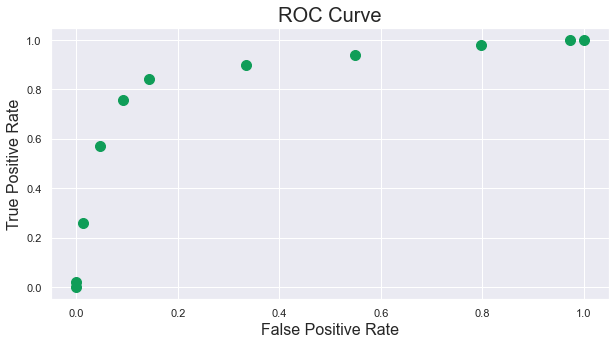

In [26]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
plt.figure(figsize=(10,5))

ROC = roc_from_scratch(prob_vector,y_test,partitions=10)
plt.scatter(ROC[:,0],ROC[:,1],color='#0F9D58',s=100)
plt.title('ROC Curve',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=16)
plt.ylabel('True Positive Rate',fontsize=16)

In [27]:
#AUC
def create_triangle(tpr_0,tpr_1,fpr_0,fpr_1):
    plt.plot([tpr_0,tpr_1],[fpr_0,fpr_1], 'k-', lw=2,color='#4285F4')
    plt.plot([tpr_0,tpr_1],[fpr_1,fpr_1], 'k-', lw=2,color='#4285F4')
    plt.plot([tpr_0,tpr_0],[fpr_0,fpr_1], 'k-', lw=2,color='#4285F4')
    print('area: ',(tpr_0-tpr_1)*(fpr_0-fpr_1)/2)

def create_rectangle(tpr_0,fpr_0):
    plt.plot([tpr_0,tpr_0],[fpr_0,0], 'k-', lw=2,color='#4285F4')

In [28]:
import pandas as pd
import numpy as np
partitions = 100
ROC = roc_from_scratch(prob_vector, y_test, partitions=partitions)
fpr, tpr = ROC[:, 0], ROC[:, 1]
rectangle_roc = 0
for k in range(partitions):
        rectangle_roc = rectangle_roc + (fpr[k]- fpr[k + 1]) * tpr[k]
rectangle_roc

0.896403005646703

In [29]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,prob_vector)

0.8935129607398514

#### 2. Use the above function and matplotlib to draw ROC curves with varying thresholds. Determine the best model in terms of the AUC. (Note: all ROC curves must be plotted in a single plot).

In [30]:

train = df1[df1['Year'] < 2009].to_numpy()
test = df1[df1['Year'] > 2008].to_numpy()


x_train = train[:, 1:-1]
y_train = train[:, -1]
x_test = test[:, 1:-1]
y_test = test[:, -1]

#print(x_train, y_train, x_test, y_test)

In [31]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty = 'l2',random_state=0).fit(x_train, y_train)
clf.predict(x_test[:2, :])
clf.predict_proba(x_test[:2, :])
clf.score(x_test, y_test)

0.46153846153846156

In [32]:
prob_vector = clf.predict_proba(x_test)[:, 1]

In [33]:
def true_false_positive(threshold_vector, y_test):
    true_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 1)
    true_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 0)
    false_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 0)
    false_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 1)

    tpr = true_positive.sum() / (true_positive.sum() + false_negative.sum())
    fpr = false_positive.sum() / (false_positive.sum() + true_negative.sum())

    return tpr, fpr

In [34]:
def roc_from_scratch(probabilities, y_test, partitions=100):
    roc = np.array([])
    for i in range(partitions + 1):
        
        threshold_vector = np.greater_equal(probabilities, i / partitions).astype(int)
        tpr, fpr = true_false_positive(threshold_vector, y_test)
        roc = np.append(roc, [fpr, tpr])
        
    return roc.reshape(-1, 2)

Text(0, 0.5, 'True Positive Rate')

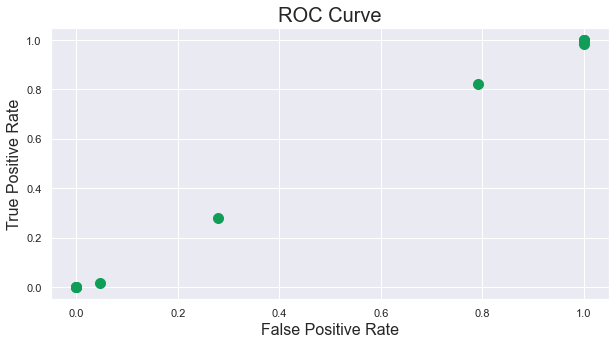

In [35]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
plt.figure(figsize=(10,5))

ROC = roc_from_scratch(prob_vector,y_test,partitions=10)
plt.scatter(ROC[:,0],ROC[:,1],color='#0F9D58',s=100)
plt.title('ROC Curve',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=16)
plt.ylabel('True Positive Rate',fontsize=16)

#### 3. Repeat step 2 with the reference implementation from scikit-learn.

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [37]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Random Model')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [38]:
probs = clf.predict_proba(x_test)

In [39]:
probs = probs[:, 1]

In [40]:
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.52


In [41]:
fpr, tpr, thresholds = roc_curve(y_test, probs)

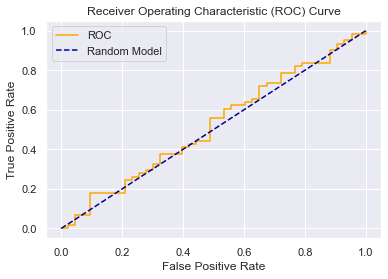

In [42]:
plot_roc_curve(fpr, tpr)

#### 4. Fit suitable k-nn and decision tree models to the Weekly dataset, and compare them with the best logistic regression model obtained in part 2. Report the confusion matrices, accuracies, AUCs and the ROC curves (on the same plot) and comment on which model is the better one among the three types.

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### A. kNN model

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

from sklearn import tree

from sklearn.preprocessing import LabelEncoder

In [45]:
dataset = pd.read_csv('Weekly.csv')


In [46]:
new_data = dict(dataset.dtypes)

for name , type_ in new_data.items():
    if str(type_) == 'object':
        Le = LabelEncoder()
        dataset[name] = Le.fit_transform(dataset[name])

In [47]:
X = dataset.iloc[:, [1,2,3,4,5,6,7,8]].values
y = dataset['Direction'].values.astype(np.uint8)

In [48]:
dataset.head()

,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,0
1,2,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,0
2,3,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,1
3,4,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,1
4,5,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,1


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 4)

In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [51]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [52]:
y_pred = classifier.predict(X_test)

In [53]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
cm

array([[ 82,  22],
       [  6, 108]])

In [54]:
ac

0.8715596330275229

In [55]:

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title(' Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

NameError: name 'cf_matrix' is not defined

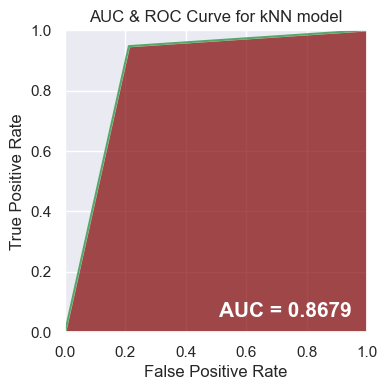

In [56]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test,y_pred)

false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_pred)

plt.figure(figsize=(6, 4), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve for kNN model")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='maroon', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=15, weight='bold', color='white')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

##### B. Decision Tree model

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.tree import DecisionTreeClassifier

In [58]:
our_data = pd.read_csv("Weekly.csv")

In [59]:
our_data.head()

,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,2,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,3,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,4,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,5,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [60]:
from sklearn.preprocessing import LabelEncoder

new_data = dict(our_data.dtypes)

for name , type_ in new_data.items():
    if str(type_) == 'object':
        Le = LabelEncoder()
        our_data[name] = Le.fit_transform(our_data[name])

In [61]:
our_data.head()

,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,0
1,2,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,0
2,3,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,1
3,4,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,1
4,5,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,1


In [62]:
X = our_data.iloc[:,[1,2,3,4,5,6,7,8]].values 
Y = our_data['Direction'].values.astype(np.uint8)

In [63]:
from sklearn.model_selection import train_test_split
# training set is 80% of the dataset
Xtrain , Xtest , Ytrain , Ytest = train_test_split(X , Y , test_size = 0.2 , random_state = 4)

In [64]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(Xtrain,Ytrain)

#Predict the response for test dataset
y_pred1 = clf.predict(Xtest)

In [65]:
# Model Accuracy, how often is the classifier correct?
from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(Ytest, y_pred1))

Accuracy: 1.0


In [66]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(Xtrain,Ytrain)

#Predict the response for test dataset
y_pred1 = clf.predict(Xtest)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Ytest, y_pred1))

Accuracy: 1.0


In [67]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(Ytest, y_pred1)

print(cf_matrix)

[[104   0]
 [  0 114]]


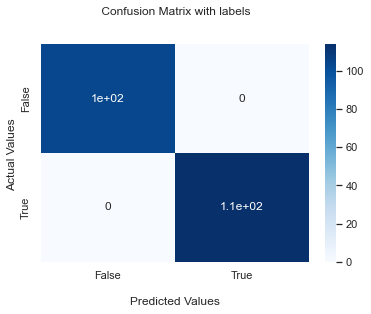

In [68]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title(' Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

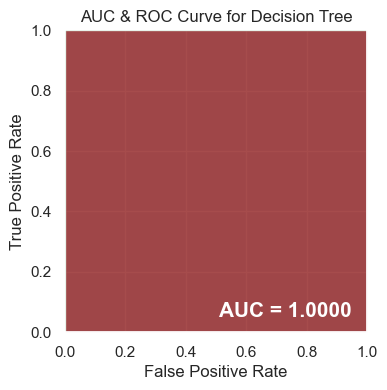

In [69]:
from sklearn import metrics
auc = metrics.roc_auc_score(Ytest, y_pred1)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(Ytest, y_pred1)

plt.figure(figsize=(6, 4), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve for Decision Tree")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='maroon', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=15, weight='bold', color='white')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

From the above graphs, we can deduce that, Decision Tree gives the best accuracy and hence it is the best model for our implementation.